In [1]:
import cv2 
import numpy as np 
import sklearn as sk 
import math 
import random
from matplotlib import pyplot as plt

In [2]:

def Diff(x,y):
    if(x<y):
        return y-x
    else:
        return x-y
    
def randCenterInit(k):
    points= []
    for i in range(k):
        points.append([[random.randint(0,img.shape[0]-1),random.randint(0,img.shape[1]-1)]])
        points[i].append(img[points[i][0][0]][points[i][0][1]].copy())
    return points

def Threshold_val(a, b, threshold):
    for i in range(3):
        if(abs(a[i]-b[i]) > threshold):
            return False
    return True

def Set_k(*args):
    k = cv2.getTrackbarPos("k_value","Trackbar")

def ssd(a,b):
    sq = [(Diff(a[i],b[i]))**2 for i in range(3)]
    res = math.sqrt(sq[0] + sq[1] + sq[2])
    return res


In [3]:
def voronoi(cPoints, img, k, threshold):
    end = False
    avgInt = []
    intCtr = []
    pClusters = []
    while(not end):
        pClusters = []
        for i in range(k):
            pClusters.append([])
        avgInt = []
        intCtr = []
        for i in range(k):
            avgInt.append([0,0,0])
            intCtr.append(0)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                ssds = []
                for h in range(k):
                    ssds.append(ssd(cPoints[h][1],img[i][j]))
                minidx = np.argmin(ssds)
                pClusters[minidx].append([i,j])
                avgInt[minidx] += img[i][j]
                intCtr[minidx] += 1
        for i in range(k):
            for j in range(3):
                avgInt[i][j] /= intCtr[i]
        idx = []
        for i in range(k):
            if (not Threshold_val(cPoints[i][1], avgInt[i],threshold)):
                idx.append(i)
                end = False
                break
            else:
                end = True
        if(not end):
            for i in idx:
                cPoints[i][1] = avgInt[i].copy()
    for i in range(k):
        intensity = avgInt[i].copy()
        for coord in pClusters[i]:
            img[coord[0]][coord[1]] = intensity.copy()
    print("done")
    return(img)

In [4]:
def kMeans(img):
    k = cv2.getTrackbarPos("k_value","Trackbar")
    cPoints = randCenterInit(k)
    threshold = round(255/k)
    voronoi(cPoints,img,k,threshold)
    return k

In [5]:
img = cv2.imread("baboon.jpg")
k = 0
img_size = [img.shape[0], img.shape[1]]
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("k_value",'Trackbar',1,30,Set_k)
while True:
    cv2.imshow('Trackbar',img)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        k = kMeans(img)
res = img.copy()
cv2.destroyAllWindows()

done


Text(0.5, 1.0, 'k = 10')

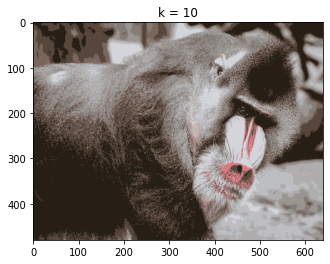

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("k = " + str(k))

In [7]:
img = cv2.imread("SAFlag.jpg")
k = 0
img_size = [img.shape[0], img.shape[1]]
cv2.namedWindow('Trackbar',cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("k_value",'Trackbar',1,30,Set_k)
while True:
    cv2.imshow('Trackbar',img)
    key = cv2.waitKey(1) 
    if key==27:
        break
    if key ==13:
        k = kMeans(img)
res = img.copy()
cv2.destroyAllWindows()

done


Text(0.5, 1.0, 'k = 25')

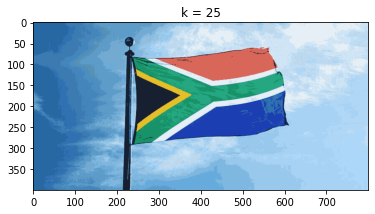

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("k = " + str(k))